In [19]:

import numpy as np
import rasterio
from rasterio.plot import show
from osgeo import gdal
import geopandas

In [20]:
dataset = rasterio.open('../Lab_01/soil_moisture.tif')
print('Count -> ', dataset.count, '\nWidth -> ', dataset.width, '\nHeight -> ', dataset.height)

Count ->  1 
Width ->  777 
Height ->  505


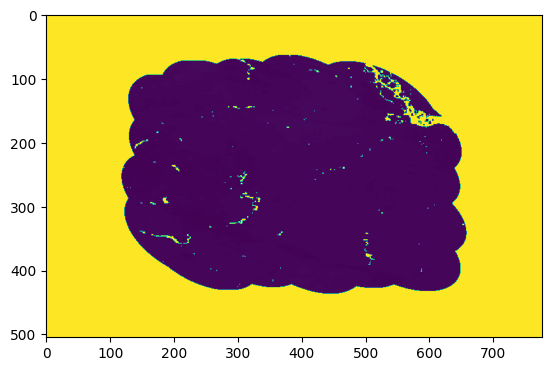

<Axes: >

In [21]:
array = dataset.read(1)
show(array)

In [22]:
dataset.meta


{'driver': 'GTiff',
 'dtype': 'uint16',
 'nodata': None,
 'width': 777,
 'height': 505,
 'count': 1,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(0.002083333, 0.0, 29.566633136000007,
        0.0, -0.002083333, 50.486672568)}

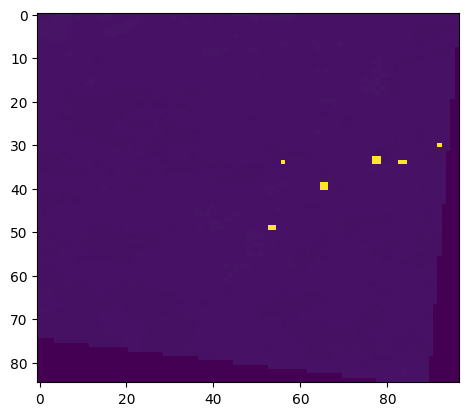

<Axes: >

In [31]:
inFile = '../Lab_01/soil_moisture.tif'
shpin = "polygon.geojson"
OutDS = "./soil.tif"
result = gdal.Warp(OutDS, inFile, cutlineDSName=shpin, cropToCutline = True)

dataset2 = rasterio.open('./soil.tif')
array2 = dataset2.read(1)
show(array2)

In [32]:
gdal.Translate('./soil.jpg', OutDS, format='JPEG')

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x00000295997184E0> >

In [36]:
dataset.close()
dataset = gdal.Open('../Lab_01/soil_moisture.tif')
transform = dataset.GetGeoTransform()

pixel_x1 = 100
pixel_y1 = 200

pixel_x2 = 300
pixel_y2 = 400

x1 = transform[0] + pixel_x1 * transform[1]
y1 = transform[3] + pixel_y1 * transform[5]

x2 = transform[0] + pixel_x2 * transform[1]
y2 = transform[3] + pixel_y2 * transform[5]

target_epsg = osr.SpatialReference()
target_epsg.ImportFromEPSG(3857)

image_epsg = osr.SpatialReference()
image_epsg.ImportFromWkt(dataset.GetProjection())

transformation = osr.CoordinateTransformation(image_epsg, target_epsg)
point1 = transformation.TransformPoint(x1, y1)
point2 = transformation.TransformPoint(x2, y2)

print(f'Точка 1: ({point1[0]}, {point1[1]})')
print(f'Точка 2: ({point2[0]}, {point2[1]})')

Точка 1: (5573767.56837393, 3474656.5495024156)
Точка 2: (5527384.454631365, 3528206.3432640517)
